## 数据获取

下载数据文件可以通过`wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data -O housing.data`命令或通过链接在网页端下载。关于`波斯顿房价`数据集的介绍可以参见我之前发的[这篇博客](https://blog.csdn.net/qq_39567427/article/details/105689972)

## 模块导入

In [1]:
import paddle
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import paddle.nn.functional as F
from visualdl import LogWriter
import warnings
warnings.filterwarnings("ignore")

paddle.__version__

'2.0.0-rc1'

## 数据处理

In [2]:
%matplotlib inline

**数据格式如下**  
![图](https://img-blog.csdnimg.cn/20200422185123401.png)
这是之前的博客截图，之前的数据剔除了一行，所以略有不同

读取数据并转成`numpy`格式，由于转换后是一个一列的向量，所以需要调整为一个矩阵形式，因此我们将其调整为`[N, 14]`维度

In [3]:
datafile = './housing.data'
housing_data = np.fromfile(datafile, sep=' ')
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
feature_num = len(feature_names)
housing_data = housing_data.reshape([housing_data.shape[0] // feature_num, feature_num])

将所获取的数据按照自变量与因变量分割开来，即将特征与标签分开。`feature_np`表示自变量，`labels_np`表示因变量

In [4]:
features_np = np.array([x[:13] for x in housing_data], np.float32)
labels_np = np.array([x[-1] for x in housing_data], np.float32)

利用`seaborn`可视化Y值与每一个单独的X变量之间的关系统计数据，第一个图是Y值的分布情况

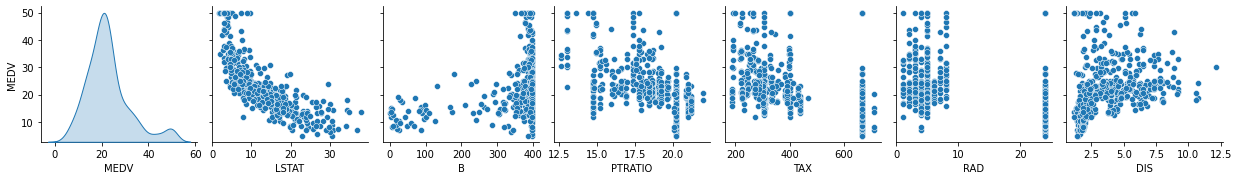

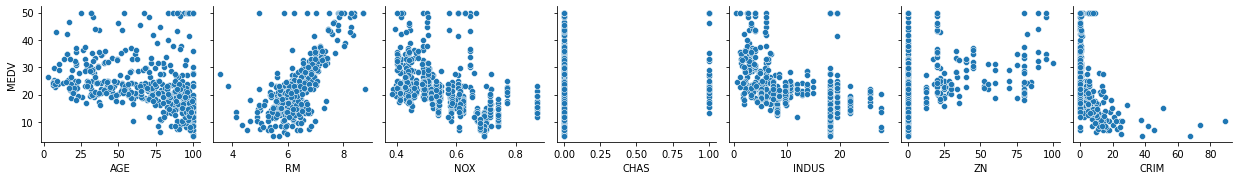

In [5]:
df = pd.DataFrame(housing_data, columns=feature_names)
sns.pairplot(df.dropna(), y_vars=feature_names[-1], x_vars=feature_names[::-1][0:7], diag_kind='kde')
sns.pairplot(df.dropna(), y_vars=feature_names[-1], x_vars=feature_names[::-1][7:14], diag_kind='kde')
plt.show()

相关性分析，通过`corr()`函数计算协方差，其计算结果如下所示，通过选取最后一列来确定每一个X变量与Y值的相关性

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CRIM</th>
      <th>ZN</th>
      <th>INDUS</th>
      <th>CHAS</th>
      <th>NOX</th>
      <th>RM</th>
      <th>AGE</th>
      <th>DIS</th>
      <th>RAD</th>
      <th>TAX</th>
      <th>PTRATIO</th>
      <th>B</th>
      <th>LSTAT</th>
      <th>MEDV</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>CRIM</th>
      <td>1.000000</td>
      <td>-0.200469</td>
      <td>0.406583</td>
      <td>-0.055892</td>
      <td>0.420972</td>
      <td>-0.219247</td>
      <td>0.352734</td>
      <td>-0.379670</td>
      <td>0.625505</td>
      <td>0.582764</td>
      <td>0.289946</td>
      <td>-0.385064</td>
      <td>0.455621</td>
      <td>-0.388305</td>
    </tr>
    <tr>
      <th>ZN</th>
      <td>-0.200469</td>
      <td>1.000000</td>
      <td>-0.533828</td>
      <td>-0.042697</td>
      <td>-0.516604</td>
      <td>0.311991</td>
      <td>-0.569537</td>
      <td>0.664408</td>
      <td>-0.311948</td>
      <td>-0.314563</td>
      <td>-0.391679</td>
      <td>0.175520</td>
      <td>-0.412995</td>
      <td>0.360445</td>
    </tr>
    <tr>
      <th>INDUS</th>
      <td>0.406583</td>
      <td>-0.533828</td>
      <td>1.000000</td>
      <td>0.062938</td>
      <td>0.763651</td>
      <td>-0.391676</td>
      <td>0.644779</td>
      <td>-0.708027</td>
      <td>0.595129</td>
      <td>0.720760</td>
      <td>0.383248</td>
      <td>-0.356977</td>
      <td>0.603800</td>
      <td>-0.483725</td>
    </tr>
    <tr>
      <th>CHAS</th>
      <td>-0.055892</td>
      <td>-0.042697</td>
      <td>0.062938</td>
      <td>1.000000</td>
      <td>0.091203</td>
      <td>0.091251</td>
      <td>0.086518</td>
      <td>-0.099176</td>
      <td>-0.007368</td>
      <td>-0.035587</td>
      <td>-0.121515</td>
      <td>0.048788</td>
      <td>-0.053929</td>
      <td>0.175260</td>
    </tr>
    <tr>
      <th>NOX</th>
      <td>0.420972</td>
      <td>-0.516604</td>
      <td>0.763651</td>
      <td>0.091203</td>
      <td>1.000000</td>
      <td>-0.302188</td>
      <td>0.731470</td>
      <td>-0.769230</td>
      <td>0.611441</td>
      <td>0.668023</td>
      <td>0.188933</td>
      <td>-0.380051</td>
      <td>0.590879</td>
      <td>-0.427321</td>
    </tr>
    <tr>
      <th>RM</th>
      <td>-0.219247</td>
      <td>0.311991</td>
      <td>-0.391676</td>
      <td>0.091251</td>
      <td>-0.302188</td>
      <td>1.000000</td>
      <td>-0.240265</td>
      <td>0.205246</td>
      <td>-0.209847</td>
      <td>-0.292048</td>
      <td>-0.355501</td>
      <td>0.128069</td>
      <td>-0.613808</td>
      <td>0.695360</td>
    </tr>
    <tr>
      <th>AGE</th>
      <td>0.352734</td>
      <td>-0.569537</td>
      <td>0.644779</td>
      <td>0.086518</td>
      <td>0.731470</td>
      <td>-0.240265</td>
      <td>1.000000</td>
      <td>-0.747881</td>
      <td>0.456022</td>
      <td>0.506456</td>
      <td>0.261515</td>
      <td>-0.273534</td>
      <td>0.602339</td>
      <td>-0.376955</td>
    </tr>
    <tr>
      <th>DIS</th>
      <td>-0.379670</td>
      <td>0.664408</td>
      <td>-0.708027</td>
      <td>-0.099176</td>
      <td>-0.769230</td>
      <td>0.205246</td>
      <td>-0.747881</td>
      <td>1.000000</td>
      <td>-0.494588</td>
      <td>-0.534432</td>
      <td>-0.232471</td>
      <td>0.291512</td>
      <td>-0.496996</td>
      <td>0.249929</td>
    </tr>
    <tr>
      <th>RAD</th>
      <td>0.625505</td>
      <td>-0.311948</td>
      <td>0.595129</td>
      <td>-0.007368</td>
      <td>0.611441</td>
      <td>-0.209847</td>
      <td>0.456022</td>
      <td>-0.494588</td>
      <td>1.000000</td>
      <td>0.910228</td>
      <td>0.464741</td>
      <td>-0.444413</td>
      <td>0.488676</td>
      <td>-0.381626</td>
    </tr>
    <tr>
      <th>TAX</th>
      <td>0.582764</td>
      <td>-0.314563</td>
      <td>0.720760</td>
      <td>-0.035587</td>
      <td>0.668023</td>
      <td>-0.292048</td>
      <td>0.506456</td>
      <td>-0.534432</td>
      <td>0.910228</td>
      <td>1.000000</td>
      <td>0.460853</td>
      <td>-0.441808</td>
      <td>0.543993</td>
      <td>-0.468536</td>
    </tr>
    <tr>
      <th>PTRATIO</th>
      <td>0.289946</td>
      <td>-0.391679</td>
      <td>0.383248</td>
      <td>-0.121515</td>
      <td>0.188933</td>
      <td>-0.355501</td>
      <td>0.261515</td>
      <td>-0.232471</td>
      <td>0.464741</td>
      <td>0.460853</td>
      <td>1.000000</td>
      <td>-0.177383</td>
      <td>0.374044</td>
      <td>-0.507787</td>
    </tr>
    <tr>
      <th>B</th>
      <td>-0.385064</td>
      <td>0.175520</td>
      <td>-0.356977</td>
      <td>0.048788</td>
      <td>-0.380051</td>
      <td>0.128069</td>
      <td>-0.273534</td>
      <td>0.291512</td>
      <td>-0.444413</td>
      <td>-0.441808</td>
      <td>-0.177383</td>
      <td>1.000000</td>
      <td>-0.366087</td>
      <td>0.333461</td>
    </tr>
    <tr>
      <th>LSTAT</th>
      <td>0.455621</td>
      <td>-0.412995</td>
      <td>0.603800</td>
      <td>-0.053929</td>
      <td>0.590879</td>
      <td>-0.613808</td>
      <td>0.602339</td>
      <td>-0.496996</td>
      <td>0.488676</td>
      <td>0.543993</td>
      <td>0.374044</td>
      <td>-0.366087</td>
      <td>1.000000</td>
      <td>-0.737663</td>
    </tr>
    <tr>
      <th>MEDV</th>
      <td>-0.388305</td>
      <td>0.360445</td>
      <td>-0.483725</td>
      <td>0.175260</td>
      <td>-0.427321</td>
      <td>0.695360</td>
      <td>-0.376955</td>
      <td>0.249929</td>
      <td>-0.381626</td>
      <td>-0.468536</td>
      <td>-0.507787</td>
      <td>0.333461</td>
      <td>-0.737663</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
</div>

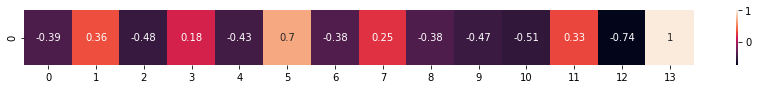

In [6]:
fig, ax = plt.subplots(figsize=(15, 1))
corr_data = df.corr().iloc[-1]
corr_data = np.asarray(corr_data).reshape(1, 14)
ax = sns.heatmap(corr_data, cbar=True, annot=True)
plt.show()

通过箱形图（Box-plot，又称为盒须图、盒式图或箱线图）我们可以发现数据之间的差距十分巨大，高的数据接近700，低的数据又在0附近，有些变量数据还具有大量的异常值

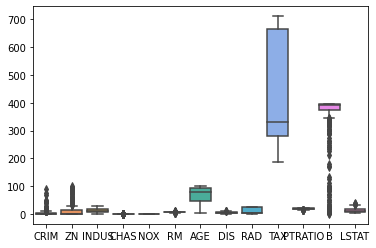

In [7]:
sns.boxplot(data=df.iloc[:, 0:13])
plt.show()

因此我们需要将数据进行归一化，推荐采取均值方差的方式进行数据归一化操作，通过使用`sklearn`带的标准函数`preprocessing.MinMaxScaler`进行，当然你也可以使用如下代码实现：
```python
features_max = housing_data.max(axis=0)
features_min = housing_data.min(axis=0)
features_avg = housing_data.sum(axis=0) / housing_data.shape[0]

def feature_norm(input):
    f_size = input.shape
    output_features = np.zeros(f_size, np.float32)
    for batch_id in range(f_size[0]):
        for index in range(13):
            output_features[batch_id][index] = (input[batch_id][index] - features_avg[index]) / (features_max[index] - features_min[index])
    return output_features

housing_features = feature_norm(housing_data[:, :13])
housing_data = np.c_[housing_features, housing_data[:, -1]].astype(np.float32)
```
这里展示一下使用上面代码块归一化获得的数据图像，大家可以对比一下
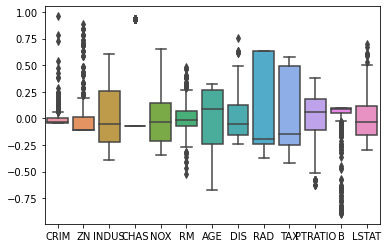
我推荐使用`preprocessing.MinMaxScaler`，因为这个函数用的每一个自变量的最大最小值以及方差，而不是用的整个变量的均值最值以及方差

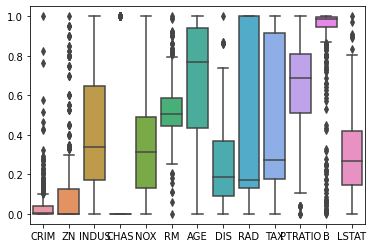

In [8]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
norm_features = minmax_scale.fit_transform(features_np)
labels_np = np.array([x[-1] for x in housing_data],np.float32)
data_np = np.c_[norm_features, labels_np]
df = pd.DataFrame(data_np, columns=feature_names)
sns.boxplot(data=df.iloc[:, 0:13])
plt.show()

In [9]:
housing_data = np.c_[norm_features, labels_np]

将数据集分为训练集以及测试集两部分，其比例为`0.8:0.2`

In [10]:
ratio = 0.8
offset = int(housing_data.shape[0] * ratio)
train_data = housing_data[:offset]
test_data = housing_data[offset:]

## 建模训练

In [11]:
class Regressor(paddle.nn.Layer):
    def __init__(self):
        super(Regressor, self).__init__()
        self.fc = paddle.nn.Linear(13, 1,)

    def forward(self, inputs):
        pred = self.fc(inputs)
        return pred

查看网络结构

In [12]:
network = Regressor()
model = paddle.Model(network)
model.summary((13))

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Linear-1            [[13]]                [1]                14       
Total params: 14
Trainable params: 14
Non-trainable params: 0
---------------------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
---------------------------------------------------------------------------



{'total_params': 14, 'trainable_params': 14}

开始训练并加入VisualDL实现对中间结果的获取

In [13]:
print('start training ... ')

EPOCH_NUM = 500
BATCH_SIZE = 64
train_num = 0
train_loss_list = []
optimizer = paddle.optimizer.SGD(learning_rate=0.001, parameters=network.parameters())

network.train()

with LogWriter(logdir="./log") as writer:
    for epoch_id in range(EPOCH_NUM):
        loss_list_each_epoch = []
        np.random.shuffle(train_data)
        mini_batches = [train_data[k: k+BATCH_SIZE] for k in range(0, len(train_data), BATCH_SIZE)]
        for batch_id, data in enumerate(mini_batches):
            features_np = np.array(data[:, :13], np.float32)
            labels_np = np.array(data[:, -1:], np.float32)
            features = paddle.to_tensor(features_np)
            labels = paddle.to_tensor(labels_np)
            y_pred = network(features)
            loss = F.mse_loss(y_pred, label=labels)
            train_loss = loss.numpy()[0]
            loss_list_each_epoch.append(train_loss)
            loss.backward()
            optimizer.step()
            optimizer.clear_grad()
        writer.add_scalar(tag="train loss", step=epoch_id+1, value=np.average(loss_list_each_epoch))
        train_loss_list.append(np.average(loss_list_each_epoch))
        if epoch_id%50 == 0:
            print("INFO:%d,Loss:%0.5f"%(epoch_id +50, train_loss))

start training ... 
INFO:50,Loss:587.41400
INFO:100,Loss:98.26337
INFO:150,Loss:96.22612
INFO:200,Loss:56.31826
INFO:250,Loss:90.47926
INFO:300,Loss:88.19588
INFO:350,Loss:91.72428
INFO:400,Loss:37.93458
INFO:450,Loss:77.85075
INFO:500,Loss:76.33766


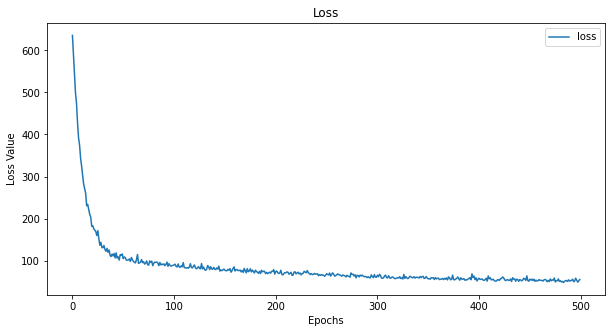

In [14]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
line_1 = plt.plot(train_loss_list)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend((line_1), ['loss'])
plt.show()

## 模型预测

In [15]:
network.eval()

INFER_BATCH_SIZE = 100

infer_features_np = np.array([data[:13] for data in test_data]).astype("float32")
infer_labels_np = np.array([data[-1] for data in test_data]).astype("float32")

infer_features = paddle.to_tensor(infer_features_np)
infer_labels = paddle.to_tensor(infer_labels_np)
fetch_list = network(infer_features)

sum_cost = 0
for i in range(INFER_BATCH_SIZE):
    infer_result = fetch_list[i][0]
    ground_truth = infer_labels[i]
    if i % 10 == 0:
        print("No.%2d: infer result is %2d.2f,ground truth is %2d.2f" % (i, infer_result, ground_truth))
    cost = paddle.pow(infer_result - ground_truth, 2)
    sum_cost += cost
mean_loss = sum_cost / INFER_BATCH_SIZE
print("Mean loss is:", mean_loss.numpy())


No. 0: infer result is 15.2f,ground truth is  8.2f
No.10: infer result is  7.2f,ground truth is  7.2f
No.20: infer result is  9.2f,ground truth is 11.2f
No.30: infer result is 13.2f,ground truth is 11.2f
No.40: infer result is 15.2f,ground truth is 10.2f
No.50: infer result is 12.2f,ground truth is 14.2f
No.60: infer result is 20.2f,ground truth is 21.2f
No.70: infer result is 17.2f,ground truth is 13.2f
No.80: infer result is 19.2f,ground truth is 20.2f
No.90: infer result is 21.2f,ground truth is 24.2f
Mean loss is: [17.516731]


In [16]:
def plot_pred_ground(pred, ground):
    plt.figure()
    plt.title("Predication v.s. Ground truth", fontsize=24)
    plt.xlabel("ground truth price(unit:$1000)", fontsize=14)
    plt.ylabel("predict price", fontsize=14)
    plt.scatter(ground, pred, alpha=0.5)
    plt.plot(ground, ground, c='red')
    plt.show()

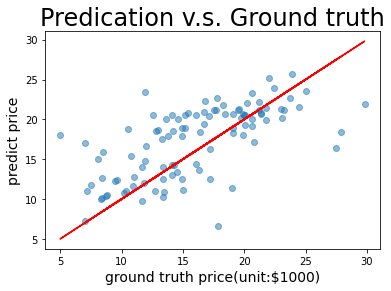

In [17]:
plot_pred_ground(fetch_list, infer_labels_np)

## VisualDL

使用VisualDL查看可以使用如下命令`visualdl --logdir ./log`
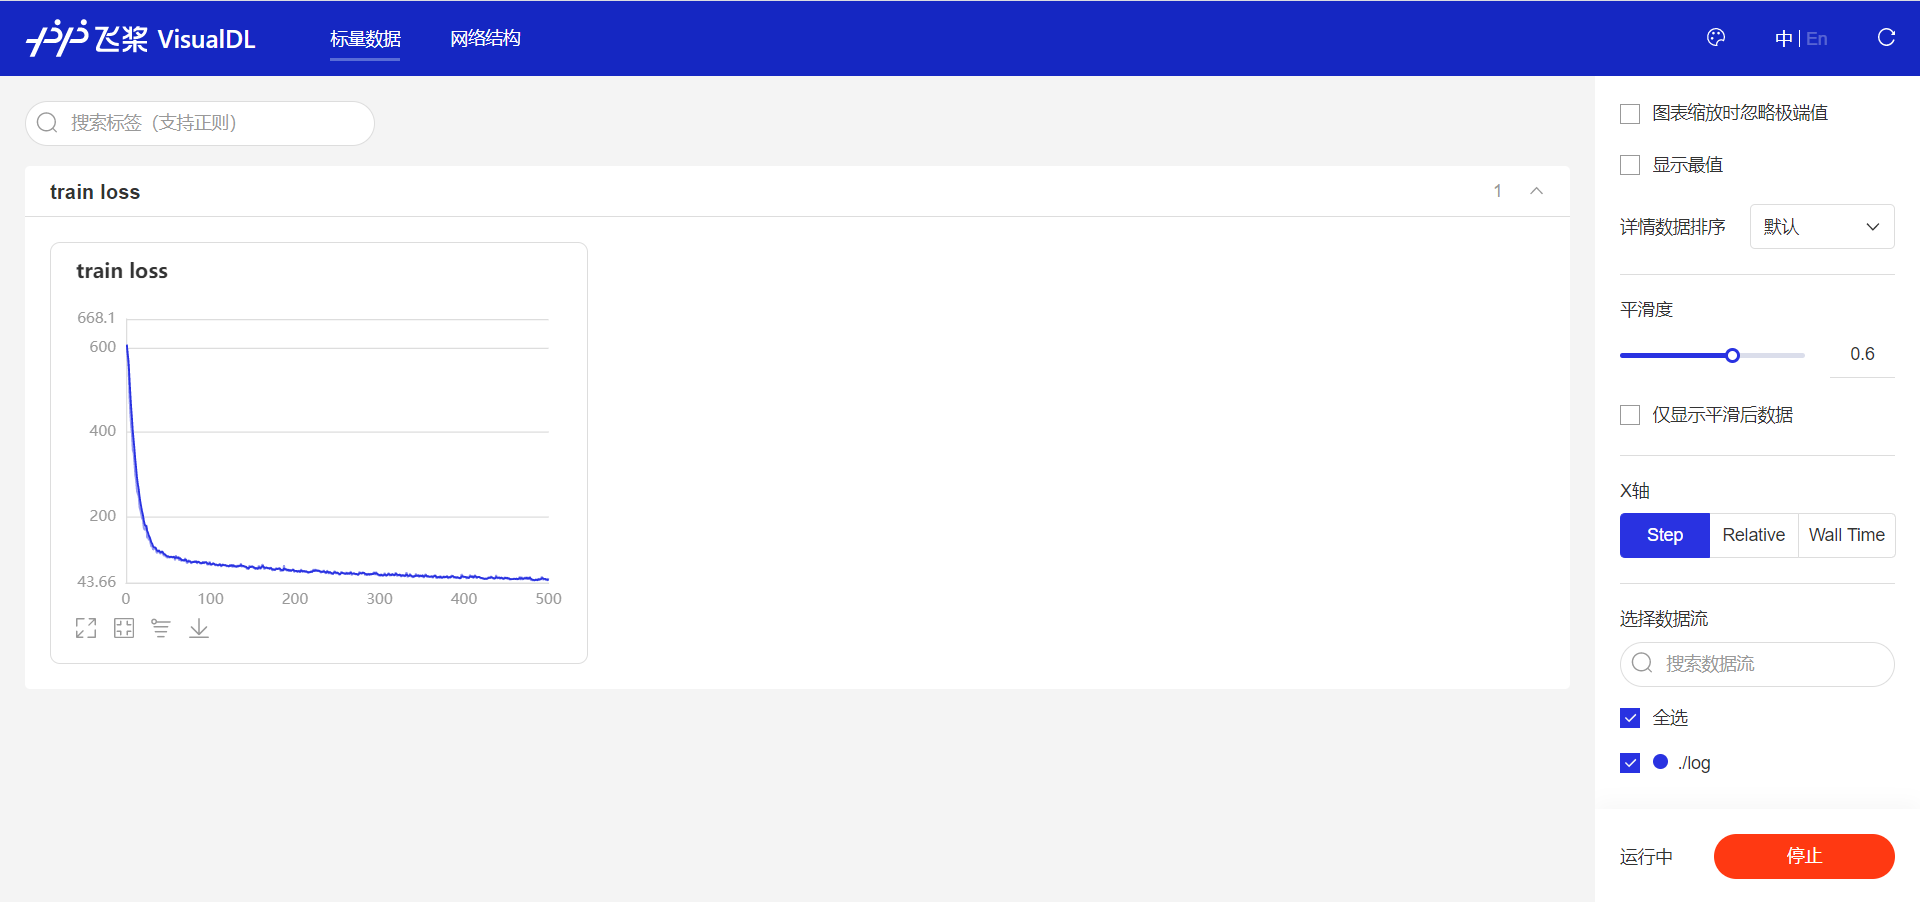